In [9]:
%pip install python-dotenv

In [20]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd

load_dotenv()

api = os.getenv("API_KEY")

client = OpenAI(
    api_key=api,
    base_url="https://api.naga.ac/v1"
    )

def generate(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )

    return response.choices[0].message.content

df = pd.read_csv("dataset_penjualan.csv")

# Tren Penjualan

In [24]:
prompt = (f"Berikan saya analisis tentang tren penjualan dari dataset penjualan yang tersedia dengan nama\n\n{df}. "
            "Saya ingin mengetahui pola penjualan selama periode waktu tertentu, serta faktor-faktor apa yang mempengaruhi kenaikan atau penurunan penjualan."
)

hasil1 = generate(prompt)
print(hasil1)

Untuk menganalisis tren penjualan dari dataset yang diberikan, ada beberapa langkah yang bisa Anda lakukan:

1. **Analisis Tren Penjualan Secara Umum:**
   - Hitung total penjualan per bulan atau per tahun untuk melihat pola penjualan secara keseluruhan.
   - Buat visualisasi seperti grafik garis untuk melihat tren penjualan dari waktu ke waktu.

2. **Faktor-faktor yang Mempengaruhi Penjualan:**
   - Perhatikan variabel cuaca dan lihat apakah ada pola penjualan yang berkorelasi dengan kondisi cuaca tertentu. Misalnya, apakah penjualan lebih tinggi saat cuaca panas atau saat cuaca hujan?
   - Anda juga bisa memeriksa apakah harga satuan memengaruhi jumlah terjual. Misalnya, apakah penjualan meningkat ketika harga turun atau sebaliknya?
   - Analisis stok juga penting. Apakah penjualan meningkat ketika stok rendah, ataukah penjualan lebih stabil ketika stok cukup?

3. **Analisis Khusus Jenis Tanaman:**
   - Periksa penjualan untuk setiap jenis tanaman. Apakah ada jenis tanaman tertentu y

# Segmentasi Pelanggan

In [25]:
prompt = (f"Tolong berikan analisis segmentasi pelanggan dari dataset penjualan yang saya miliki \n\n{df}. "
        "Saya ingin mengetahui profil pelanggan berdasarkan perilaku pembelian mereka, dan bagaimana kita dapat meningkatkan retensi pelanggan di setiap segmen."
)

hasil2 = generate(prompt)
print(hasil2)

Untuk menganalisis segmentasi pelanggan dari dataset penjualan yang Anda miliki, Anda dapat menggunakan pendekatan clustering untuk mengidentifikasi kelompok pelanggan berdasarkan karakteristik pembelian mereka. Beberapa langkah yang dapat Anda lakukan adalah:

1. Identifikasi variabel yang dapat digunakan untuk segmentasi, seperti jenis tanaman yang dibeli, harga satuan, jumlah terjual, jumlah pendapatan, dan cuaca saat pembelian.
2. Lakukan analisis statistik deskriptif untuk memahami distribusi variabel dan melihat apakah ada pola atau tren yang dapat diidentifikasi.
3. Gunakan teknik clustering seperti K-means atau hierarchical clustering untuk mengelompokkan pelanggan berdasarkan karakteristik pembelian mereka.
4. Evaluasi dan interpretasikan hasil clustering untuk mengidentifikasi segmentasi pelanggan yang jelas.
5. Lakukan analisis lebih lanjut untuk memahami profil pelanggan di setiap segmen, termasuk preferensi pembelian, tingkat loyalitas, dan faktor-faktor lain yang dapat me

# Prediksi Penjualan

In [26]:
prompt = (f"Berdasarkan data penjualan historis yang tersedia \n\n{df}, "
          "tolong lakukan prediksi untuk penjualan masa depan."
          "Saya ingin mengetahui perkiraan penjualan untuk periode waktu tertentu, serta faktor-faktor apa yang berkontribusi pada perubahan dalam penjualan."
)

hasil3 = generate(prompt)
print(hasil3)

Untuk melakukan prediksi penjualan masa depan, Anda dapat menggunakan metode analisis time series seperti ARIMA (AutoRegressive Integrated Moving Average) atau menggunakan metode machine learning seperti regresi linear, regresi logistik, atau Decision Tree.

Langkah-langkah umum untuk melakukan prediksi penjualan masa depan adalah sebagai berikut:
1. Analisis data historis penjualan yang Anda miliki untuk mengidentifikasi tren, musiman, dan pola penjualan.
2. Bersihkan data dari outlier dan missing values jika ada.
3. Pilih model yang sesuai untuk melakukan prediksi berdasarkan karakteristik data penjualan Anda.
4. Latih model menggunakan data historis yang ada.
5. Lakukan validasi model menggunakan data testing untuk mengevaluasi keakuratan prediksi.
6. Gunakan model yang sudah dilatih untuk memprediksi penjualan masa depan.

Faktor-faktor yang dapat berkontribusi pada perubahan dalam penjualan bisa beragam, seperti cuaca (suhu, hujan, angin), musim, promosi, harga, dan faktor ekstern

# Analisis Data Awal

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NO                 212 non-null    int64         
 1   tanggal_pembelian  212 non-null    datetime64[ns]
 2   jenis_tanaman      212 non-null    object        
 3   harga_satuan       212 non-null    int64         
 4   stok               212 non-null    int64         
 5   jumlah_terjual     212 non-null    int64         
 6   jumlah_pendapatan  212 non-null    int64         
 7   cuaca              212 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 13.4+ KB


# Visualisasi

C:\Users\ACER\AppData\Local\Temp\ipykernel_1852\292028906.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='tanggal_pembelian').sum()


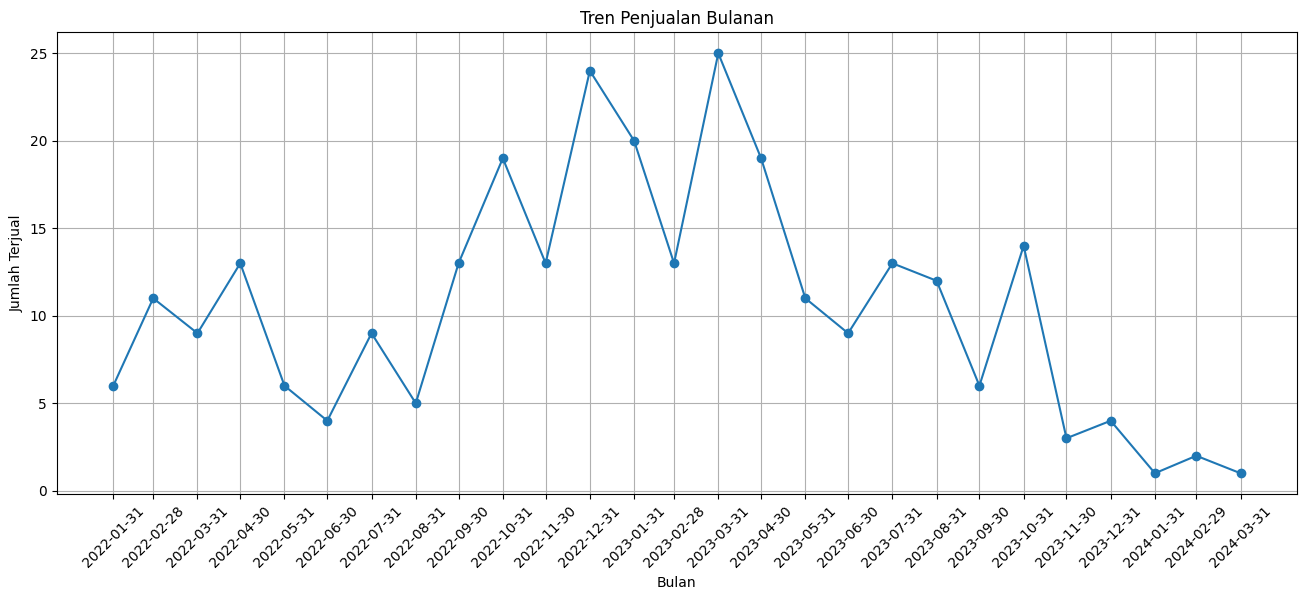

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom tanggal_pembelian ke tipe datetime
df['tanggal_pembelian'] = pd.to_datetime(df['tanggal_pembelian'])

# 1. Grafik Garis Tren Penjualan Secara Umum
monthly_sales = df.resample('M', on='tanggal_pembelian').sum()
plt.figure(figsize=(16, 6))
plt.plot(monthly_sales.index, monthly_sales['jumlah_terjual'], marker='o', linestyle='-')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Terjual')
plt.xticks(monthly_sales.index, rotation=45)
plt.grid(True)
plt.show()

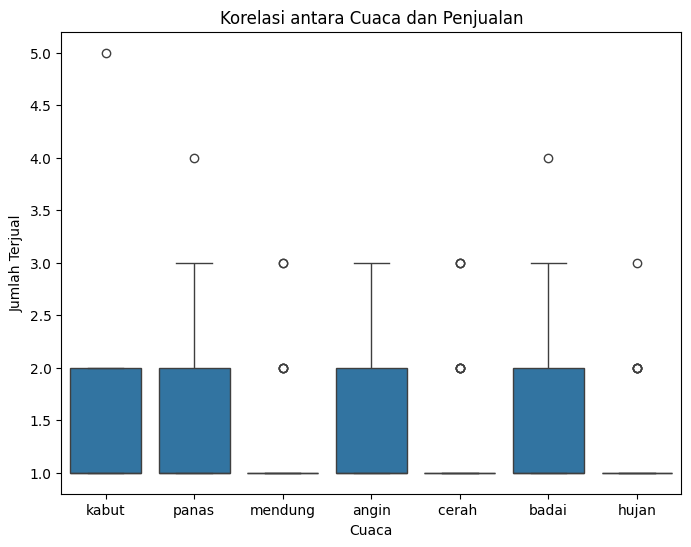

In [34]:
# 2. Korelasi antara Cuaca dan Penjualan
plt.figure(figsize=(8, 6))
sns.boxplot(x='cuaca', y='jumlah_terjual', data=df)
plt.title('Korelasi antara Cuaca dan Penjualan')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Terjual')
plt.show()

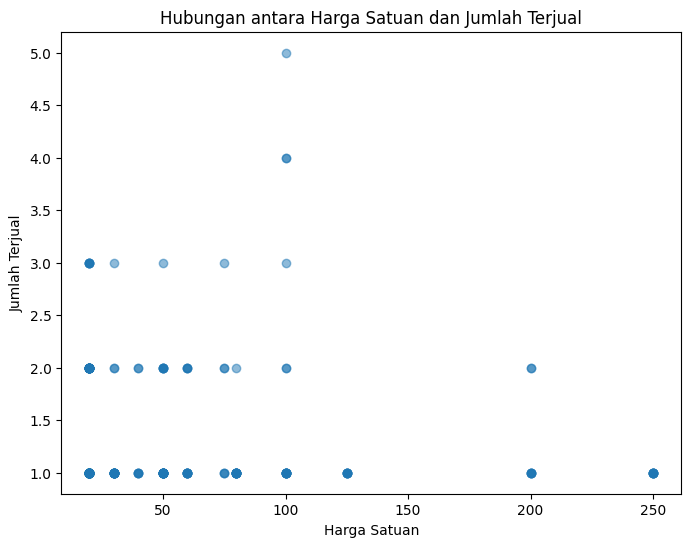

In [35]:
# 3. Scatter plot Harga Satuan vs Jumlah Terjual
plt.figure(figsize=(8, 6))
plt.scatter(df['harga_satuan'], df['jumlah_terjual'], alpha=0.5)
plt.title('Hubungan antara Harga Satuan dan Jumlah Terjual')
plt.xlabel('Harga Satuan')
plt.ylabel('Jumlah Terjual')
plt.show()

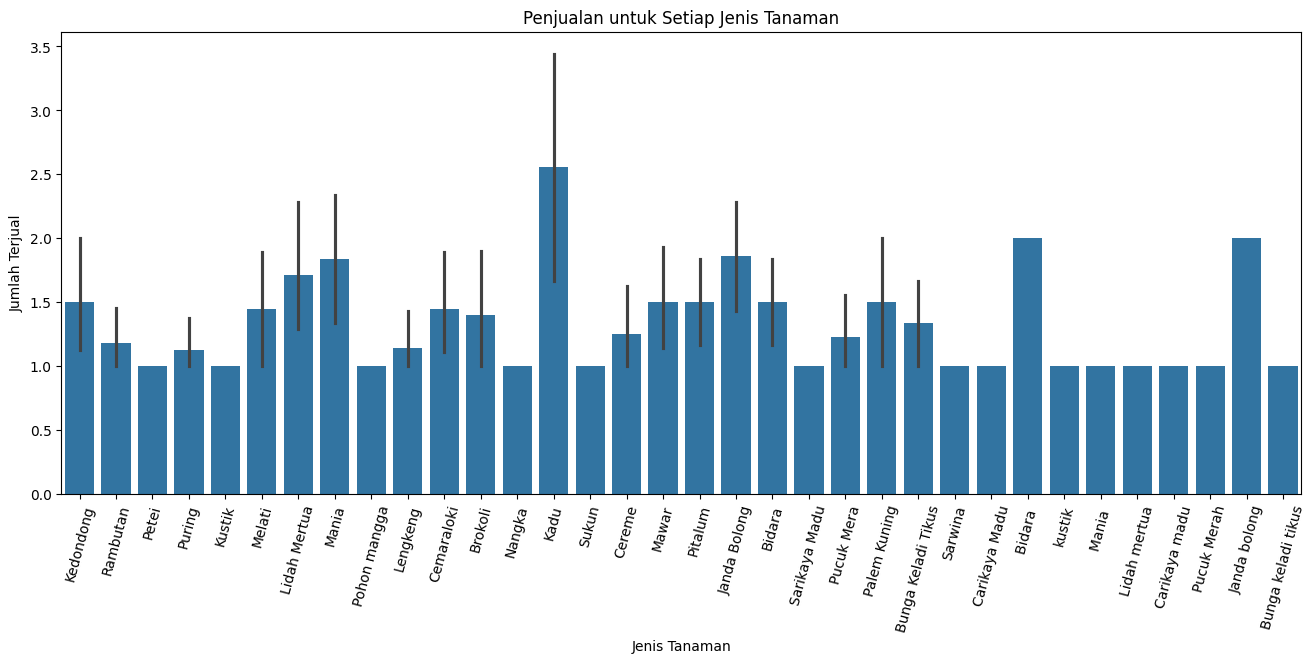

In [46]:
# 4. Analisis Penjualan untuk Setiap Jenis Tanaman
plt.figure(figsize=(16, 6))
sns.barplot(x='jenis_tanaman', y='jumlah_terjual', data=df)
plt.title('Penjualan untuk Setiap Jenis Tanaman')
plt.xlabel('Jenis Tanaman')
plt.ylabel('Jumlah Terjual')
plt.xticks(rotation=75)
plt.show()

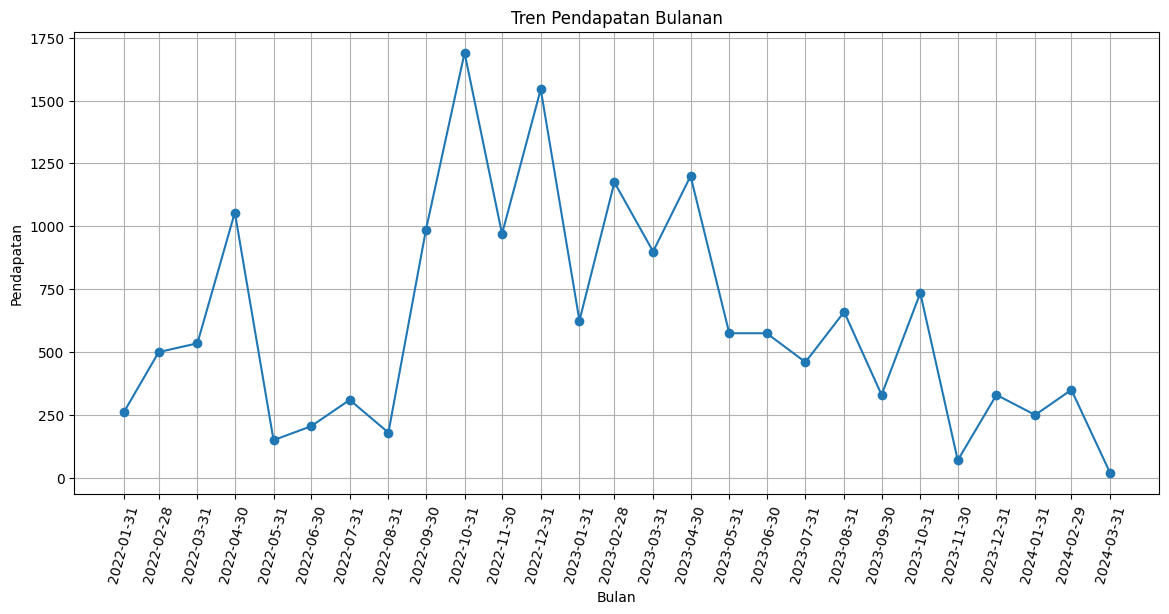

In [49]:
# 5. Grafik Garis Tren Pendapatan
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales.index, monthly_sales['jumlah_pendapatan'], marker='o', linestyle='-')
plt.title('Tren Pendapatan Bulanan')
plt.xlabel('Bulan')
plt.xticks(monthly_sales.index, rotation=75)
plt.ylabel('Pendapatan')
plt.grid(True)
plt.show()